In [ ]:
#import
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
import seaborn as sns
import numpy as np

In [ ]:
#assume/pretend that we've already cleaned the csv using command line commands(?)
#load in cleaned csv into pandas dataframe
#manually putting the csv file in the google colab runtime content folder for now
mental_health_df = pd.read_csv('/content/cleaned_students_mental_health_survey.csv')

#lets see what kinds of column data types we have
mental_health_df.info()
#based on this, we can see there are 7022 entries
#looks like there are 12 null entries in CGPA
#and 15 null entries in Substance_Use
#everything else has a value

#and print out the table!
mental_health_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7022 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7022 non-null   object 
 13  Counseling_Service

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56000,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44000,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74000,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65000,2,1,0,Average,Low,Average,Moderate,Single,Never,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40000,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,20,Law,Female,3.69000,3,1,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73000,3,4,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65000,4,5,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,24,Medical,Male,3.65000,4,3,4,Average,High,Poor,Moderate,Single,Never,Never,No,Yes,4,Moderate,18,Off-Campus


In [ ]:
#lets check the unique values for each feature, to ensure there are no inconsistent values

for col in mental_health_df:
  print(col,": ",mental_health_df[col].unique())

Age :  [25 24 19 18 21 23 28 22 27 20 31 26 35 30 32 29 34 33]
Course :  ['Others' 'Engineering' 'Business' 'Computer Science' 'Medical' 'Law']
Gender :  ['Male' 'Female']
CGPA :  [3.56       2.44       3.74       3.65       3.4        3.35
 3.8        3.05       3.49126961 3.19       3.26       3.2
 3.61       3.85       3.46       3.43       3.38       3.5
 3.6        3.08       3.88       3.21       3.62       3.16
 3.71       3.48       3.27       3.41       3.22       3.33
 3.01       3.97       4.         3.63       2.99       3.11
 3.02       3.66       3.09       3.12       3.82       3.23
 3.7        2.95       3.73       3.64       3.79       3.59
 3.34       3.87       3.24       3.44       3.1        3.25
 3.53       3.         3.29       2.98       3.04       3.51
 3.75       3.86       3.78       3.77       3.72       3.45
 3.06       3.84       3.92       3.28       2.86       3.37
 3.54       3.31       3.94       3.9        3.52       3.32
 3.14       3.68       2.85  

###QUESTION: Are individuals with higher stress levels and poor sleep quality more likely to experience higher depression or anxiety scores?
Based on the graphs, it looks like most people voted as having Good or Average sleep quality and there does not seem to be much correlation between higher stress levels and poor sleep quality to depression or anxiety scores.

In [ ]:
# Are individuals with higher stress levels and poor sleep quality more likely to experience higher depression or anxiety scores?
#Stress_Level, Depression_Score, Anxiety_Score are integer values, while Sleep_Quality is a category (object/string)
#what is the min and max values for the numerical values, to see what range we're working with here...
min_stress_level = mental_health_df["Stress_Level"].min()
max_stress_level = mental_health_df["Stress_Level"].max()
min_dep_score = mental_health_df["Depression_Score"].min()
max_dep_score = mental_health_df["Depression_Score"].max()
min_anx_score = mental_health_df["Anxiety_Score"].min()
max_anx_score = mental_health_df["Anxiety_Score"].max()
print("Stress_Level Range: [",min_stress_level,",",max_stress_level,"]")
print("Depression_Score Range: [",min_dep_score,",",max_dep_score,"]")
print("Anxiety_Score Range: [",min_anx_score,",",max_anx_score,"]")
#alright, the range is 0 - 5 for all of them, not surprising, but just making sure
#I assume 0 means none, and 5 means the most because... well why wouldn't it be that...?

#i want to see the unique values in Sleep_Quality
uniq_sleep_qual = mental_health_df["Sleep_Quality"].unique()
uniq_sleep_qual
#looks like there are only three qualities: "Good", "Average", "Poor"


#chose to do violin plots because i wanted to have a visual representation of how many people voted for each depression/anxiety option (shows distribution)

Stress_Level Range: [ 0 , 5 ]
Depression_Score Range: [ 0 , 5 ]
Anxiety_Score Range: [ 0 , 5 ]


array(['Good', 'Average', 'Poor'], dtype=object)

####Stress_Level and Sleep_Quality to Depression_Score

In [ ]:
#table with depression aggregate stats
sleep_stress_depression_stats = mental_health_df.groupby(['Sleep_Quality', 'Stress_Level'])['Depression_Score'].agg(["count", "min", "max", "mean", "median", lambda row : pd.Series.mode(row).to_list()])
sleep_stress_depression_stats.rename(columns={"count":"Number of Depression Entries",
                                              "min":"Min",
                                              "max":"Max",
                                              "mean":"Mean",
                                              "median":"Median",
                                              "<lambda_0>":"Mode"})


Number of Depression Entries  Min  Max      Mean  \
Sleep_Quality Stress_Level                                                     
Average       0                                      428    0    5  2.453271   
              1                                      493    0    5  2.318458   
              2                                      467    0    5  2.252677   
              3                                      563    0    5  2.214920   
              4                                      379    0    5  2.245383   
              5                                      405    0    5  2.096296   
Good          0                                      563    0    5  2.335702   
              1                                      610    0    5  2.245902   
              2                                      675    0    5  2.293333   
              3                                      716    0    5  2.245810   
              4                                      501    0    5  2.143713   
              5                                      524    0    5  2.171756   
Poor          0                                      107    0    5  2.168224   
              1                                      130    0    5  2.392308   
              2                                      137    0    5  2.489051   
              3                                      126    0    5  2.206349   
              4                                      112    0    5  2.080357   
              5                                       86    0    5  2.220930   

                            Median    Mode  
Sleep_Quality Stress_Level                  
Average       0                2.0  [2, 3]  
              1                2.0     [2]  
              2                2.0     [2]  
              3                2.0     [3]  
              4                2.0     [0]  
              5                2.0     [0]  
Good          0                2.0     [2]  
              1                2.0     [2]  
              2                2.0     [3]  
              3                2.0     [3]  
              4                2.0     [1]  
              5                2.0     [3]  
Poor          0                2.0     [1]  
              1                2.0  [1, 3]  
              2                2.0     [2]  
              3                2.0     [0]  
              4                2.0     [0]  
              5                2.0     [3]

In [ ]:
#color palette to make it look a bit nicer/unique
gender_colors = {"Male": "#03dbfc",
"Female" : "#e679e8"}

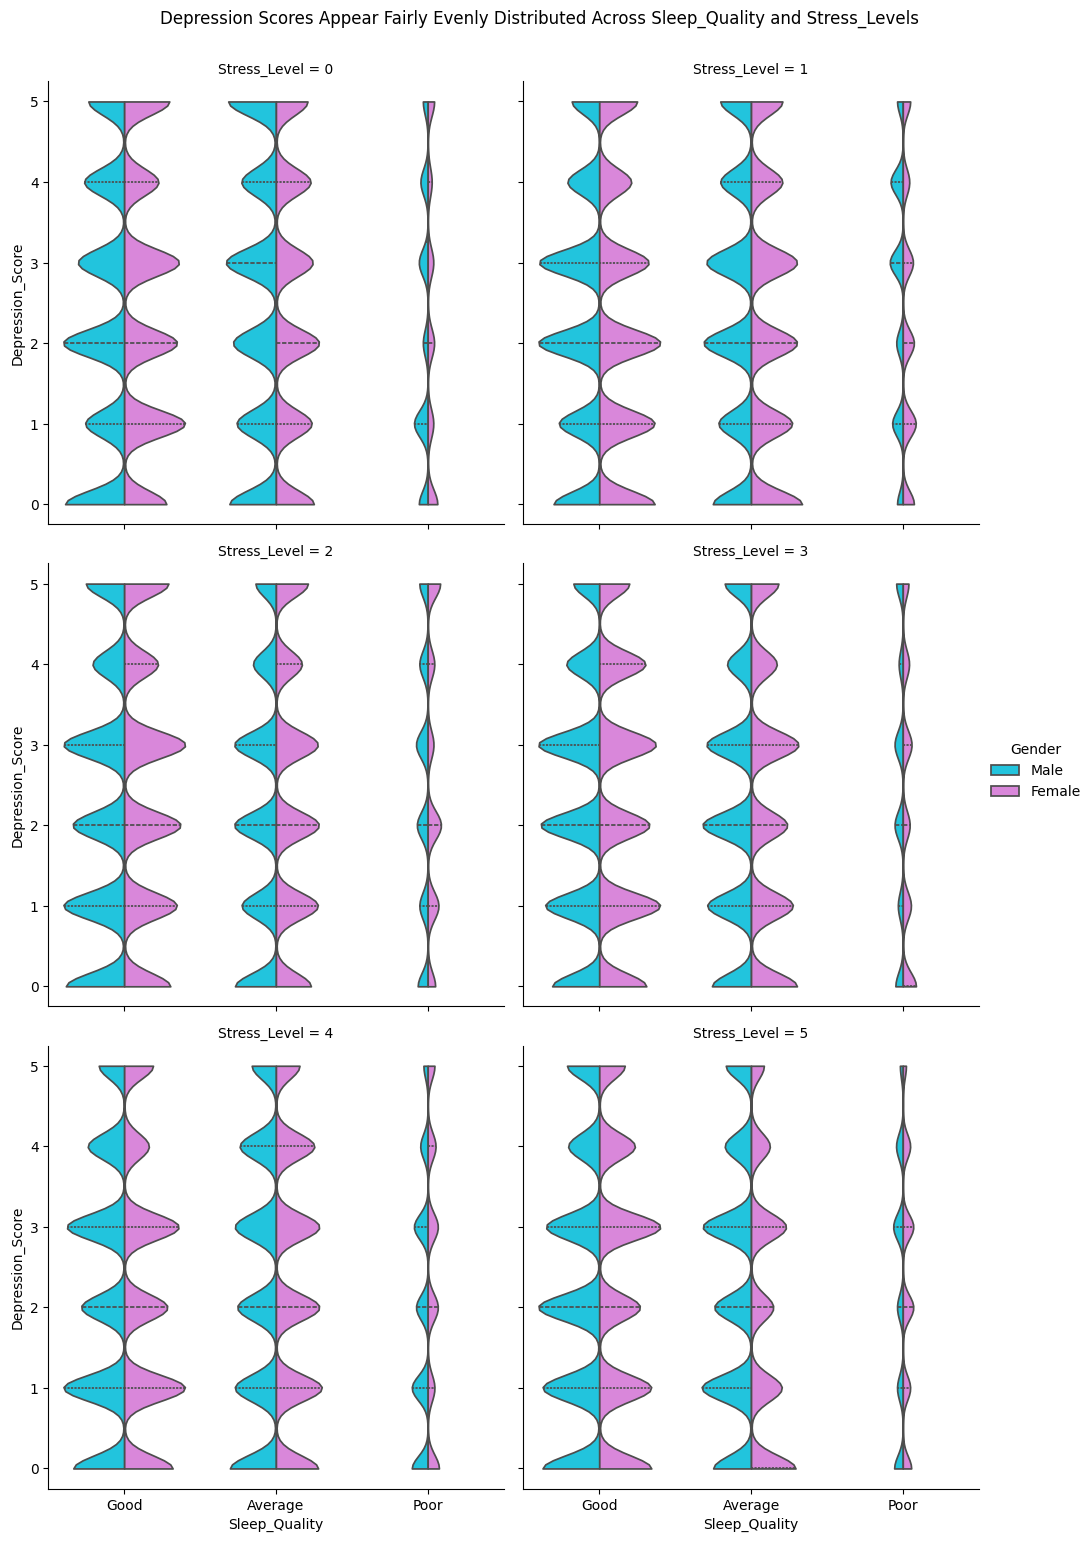

In [ ]:
sleep_stress_depression_violin_plot=sns.catplot(
    data=mental_health_df,
    x="Sleep_Quality",
    y="Depression_Score",
    kind="violin",
    inner="quart",
    cut=0,
    split=True,
    hue="Gender",
    palette=gender_colors,
    bw_method=0.1,
    density_norm="count",
    col="Stress_Level",
    col_wrap=2
    )

#actually, i might want to throw gender in there too, if i can
#and so I DID...!

sleep_stress_depression_violin_plot.fig.suptitle("Depression Scores Appear Fairly Evenly Distributed Across Sleep_Quality and Stress_Levels", y=1.025);

#saves the figure as a png that can be found in the same place where the csv is stored in google colab (under Files)
#you can then download the whole image to your computer
plt.savefig('sleep_stress_depression_violin_plot.png', bbox_inches = "tight")

In [ ]:
#table with anxiety aggregate stats
sleep_stress_anxiety_stats = mental_health_df.groupby(['Sleep_Quality', 'Stress_Level'])['Anxiety_Score'].agg(["count", "min", "max", "mean", "median", lambda row : pd.Series.mode(row).to_list()])
sleep_stress_anxiety_stats.rename(columns={"count":"Number of Anxiety Entries",
                                              "min":"Min",
                                              "max":"Max",
                                              "mean":"Mean",
                                              "median":"Median",
                                              "<lambda_0>":"Mode"})

Number of Anxiety Entries  Min  Max      Mean  \
Sleep_Quality Stress_Level                                                  
Average       0                                   428    0    5  2.383178   
              1                                   493    0    5  2.267748   
              2                                   467    0    5  2.218415   
              3                                   563    0    5  2.277087   
              4                                   379    0    5  2.366755   
              5                                   405    0    5  2.219753   
Good          0                                   563    0    5  2.373002   
              1                                   610    0    5  2.411475   
              2                                   675    0    5  2.459259   
              3                                   716    0    5  2.219274   
              4                                   501    0    5  2.227545   
              5                                   524    0    5  2.200382   
Poor          0                                   107    0    5  2.373832   
              1                                   130    0    5  2.400000   
              2                                   137    0    5  2.291971   
              3                                   126    0    5  2.158730   
              4                                   112    0    5  2.098214   
              5                                    86    0    5  2.209302   

                            Median    Mode  
Sleep_Quality Stress_Level                  
Average       0                2.0     [2]  
              1                2.0     [3]  
              2                2.0     [0]  
              3                2.0  [1, 2]  
              4                2.0     [3]  
              5                2.0  [0, 2]  
Good          0                2.0     [1]  
              1                2.0     [3]  
              2                3.0     [3]  
              3                2.0     [0]  
              4                2.0     [3]  
              5                2.0     [3]  
Poor          0                3.0     [3]  
              1                3.0     [3]  
              2                2.0     [2]  
              3                2.0     [0]  
              4                2.0     [1]  
              5                2.0     [1]

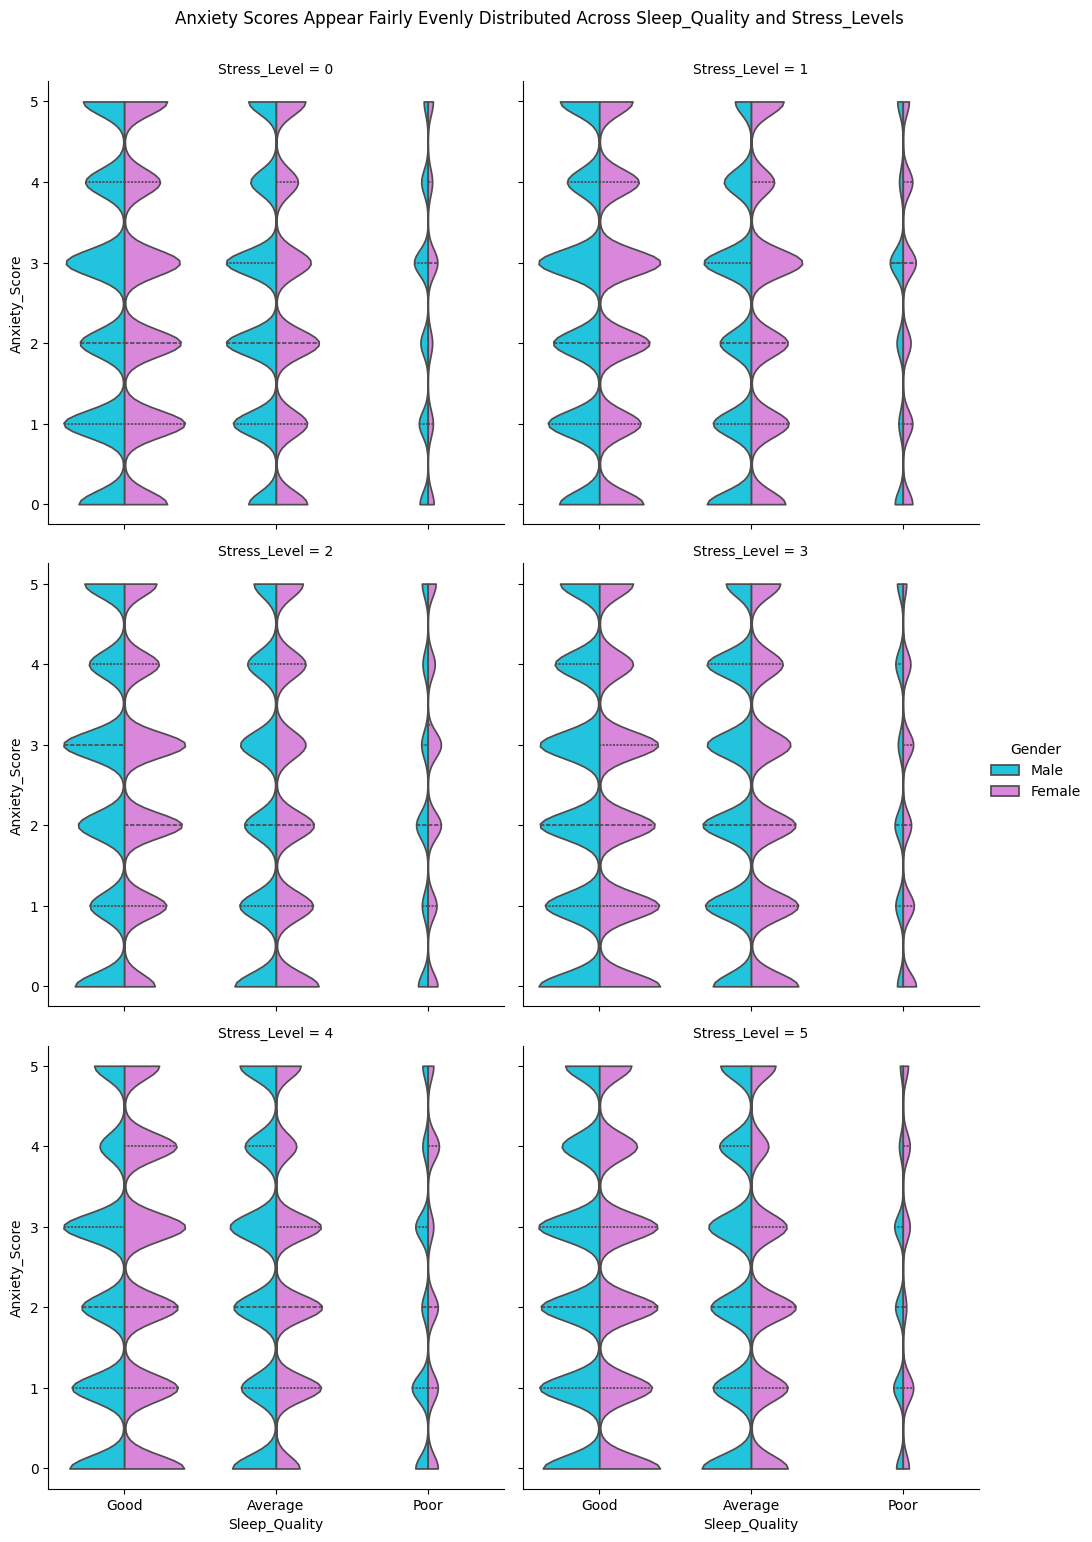

In [ ]:
sleep_stress_anxiety_violin_plot=sns.catplot(
    data=mental_health_df,
    x="Sleep_Quality",
    y="Anxiety_Score",
    kind="violin",
    inner="quart",
    split=True,
    hue="Gender",
    palette=gender_colors,
    cut=0,
    bw_method=0.1,
    density_norm="count",
    col="Stress_Level",
    col_wrap=2
    )

sleep_stress_anxiety_violin_plot.fig.suptitle("Anxiety Scores Appear Fairly Evenly Distributed Across Sleep_Quality and Stress_Levels", y=1.025);
plt.savefig('sleep_stress_anxiety_violin_plot.png', bbox_inches = "tight")

###QUESTION: How do different factors impact students’ self-reported mental health?

Based on the graphs, it looks like Computer Science majors tend to rate themselves as considerably more depressed than the other majors, while Medical and Law students rate themselves as somewhat more stressed and anxious, respectively.

In [ ]:
#color palette to make it look a bit nicer/unique
mental_health_colors = {"Stress_Level": "#bf8139",
"Depression_Score" : "#627ca6",
"Anxiety_Score" : "#d683ac"}

#maybe we can include financial stress in here too, just to visualize it since they all have the same scoring system
#it could be colored green!

####Social_Support to Stress_Level, Anxiety_Score, Depression_Score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21066 entries, 0 to 21065
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Social_Support            21066 non-null  object
 1   Mental Health Attributes  21066 non-null  object
 2   Score                     21066 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 493.9+ KB


<ipython-input-13-01dccafb3feb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stress_dep_anx_support=sns.catplot(


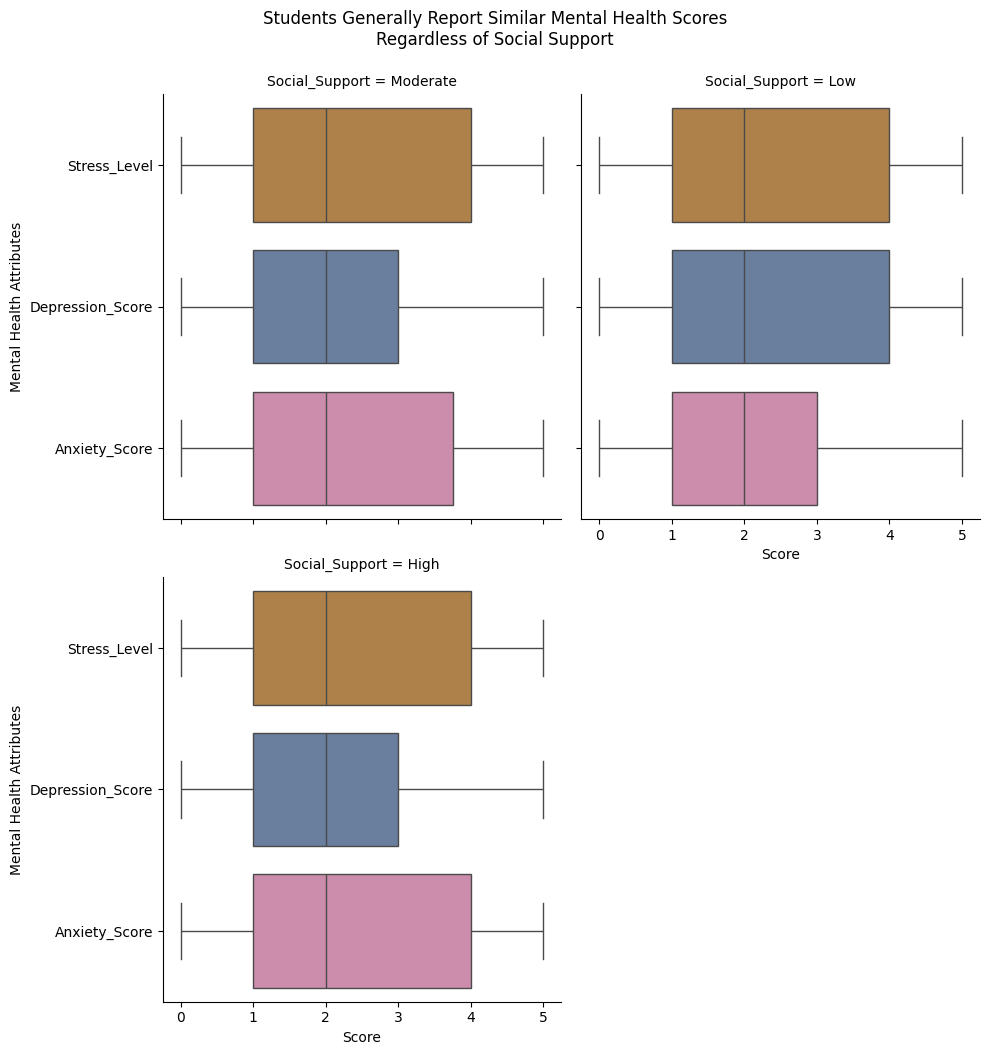

In [ ]:
# Are individuals with higher social support and physical activity less likely to experience high levels of stress, depression, or anxiety?

#box plots
#box plot for stress/depression/anxiety, one figure per social support option

#might rename the columns to get rid of underscores if needed

melted_support = pd.melt(mental_health_df, id_vars=['Social_Support'], value_vars=['Stress_Level', 'Depression_Score', 'Anxiety_Score'])
melted_support = melted_support.rename(columns={"variable":"Mental Health Attributes",
                       "value":"Score"})

melted_support.info()

stress_dep_anx_support=sns.catplot(
    data=melted_support,
    kind="box",
    x="Score",
    y="Mental Health Attributes",
    col="Social_Support",
    col_wrap=2,
    palette=mental_health_colors
)

stress_dep_anx_support.fig.suptitle("Students Generally Report Similar Mental Health Scores\nRegardless of Social Support", y=1.05);
plt.savefig('stress_dep_anx_support.png', bbox_inches = "tight")

#arguably one could say that people with Moderate social support are slightly less depressed
#that people with low social support are slightly less anxious
#and that people with high social support are slightly less depressed
#but overall they're pretty much the same distribution

In [ ]:
#melted_support where social support is moderate and where mental health attribute is anxiety score
melted_support_mod_anx = melted_support[(melted_support["Social_Support"] == "Moderate") & (melted_support["Mental Health Attributes"] == "Anxiety_Score")]
melted_support_mod_anx
print("upper quartile bound:",melted_support_mod_anx["Score"].quantile(0.75))

upper quartile bound: 3.75


####Physical_Activity to Stress_Level, Depression_Score, Anxiety_Score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21066 entries, 0 to 21065
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Physical_Activity         21066 non-null  object
 1   Mental Health Attributes  21066 non-null  object
 2   Score                     21066 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 493.9+ KB


<ipython-input-15-15b82702012c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stress_dep_anx_phys_act=sns.catplot(


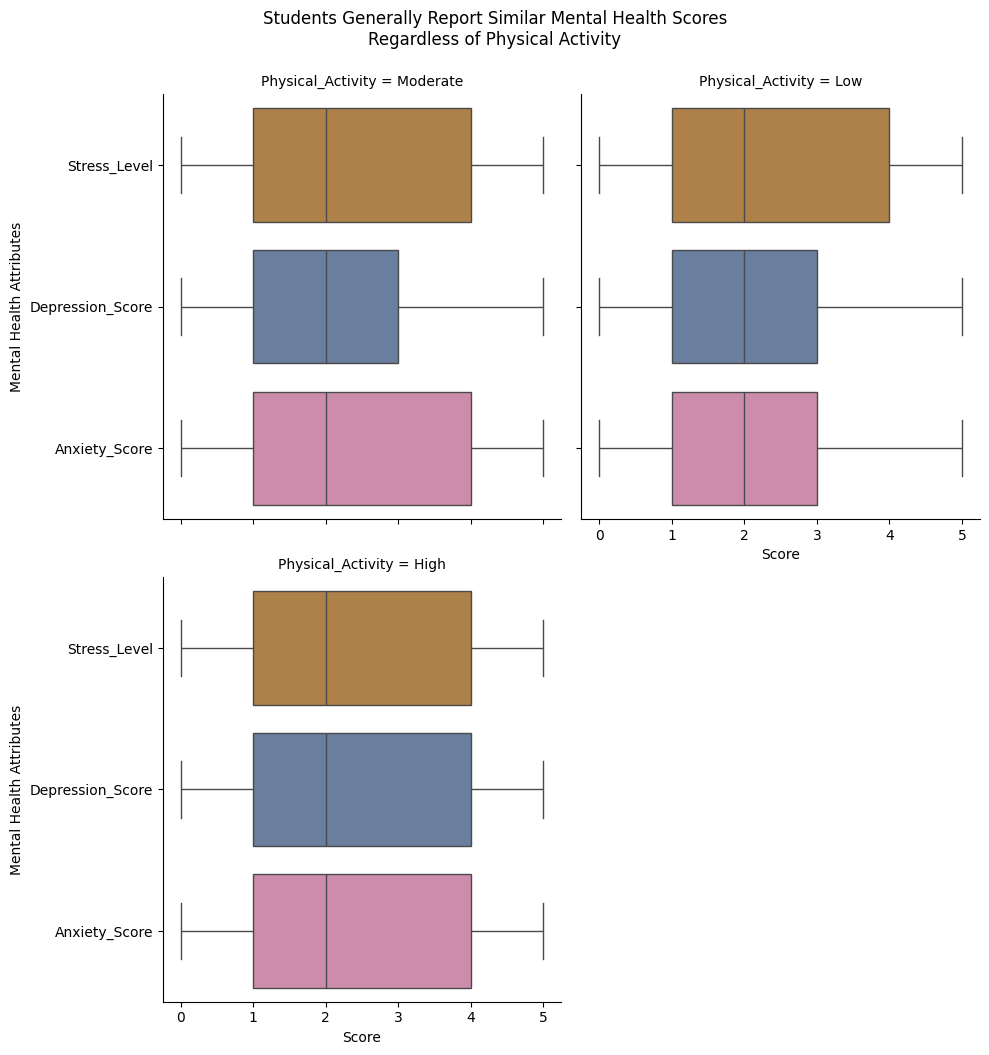

In [ ]:
melted_phys_act = pd.melt(mental_health_df, id_vars=['Physical_Activity'], value_vars=['Stress_Level', 'Depression_Score', 'Anxiety_Score'])
melted_phys_act = melted_phys_act.rename(columns={"variable":"Mental Health Attributes",
                       "value":"Score"})

melted_phys_act.info()

stress_dep_anx_phys_act=sns.catplot(
    data=melted_phys_act,
    kind="box",
    x="Score",
    y="Mental Health Attributes",
    col="Physical_Activity",
    col_wrap=2,
    palette=mental_health_colors
)

stress_dep_anx_phys_act.fig.suptitle("Students Generally Report Similar Mental Health Scores\nRegardless of Physical Activity", y=1.05);
plt.savefig('stress_dep_anx_phys_act.png', bbox_inches = "tight")

#arguably students with moderate physical activity are slightly less depressed
#and students with low physical activity are slightly less depressed and anxious
#but overall they're pretty much the same distribution

####Course to Stress_Level, Depression_Score, Anxiety_Score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21066 entries, 0 to 21065
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Course                    21066 non-null  object
 1   Mental Health Attributes  21066 non-null  object
 2   Score                     21066 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 493.9+ KB


<ipython-input-16-2e9ace0b4d37>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stress_dep_anx_course=sns.catplot(


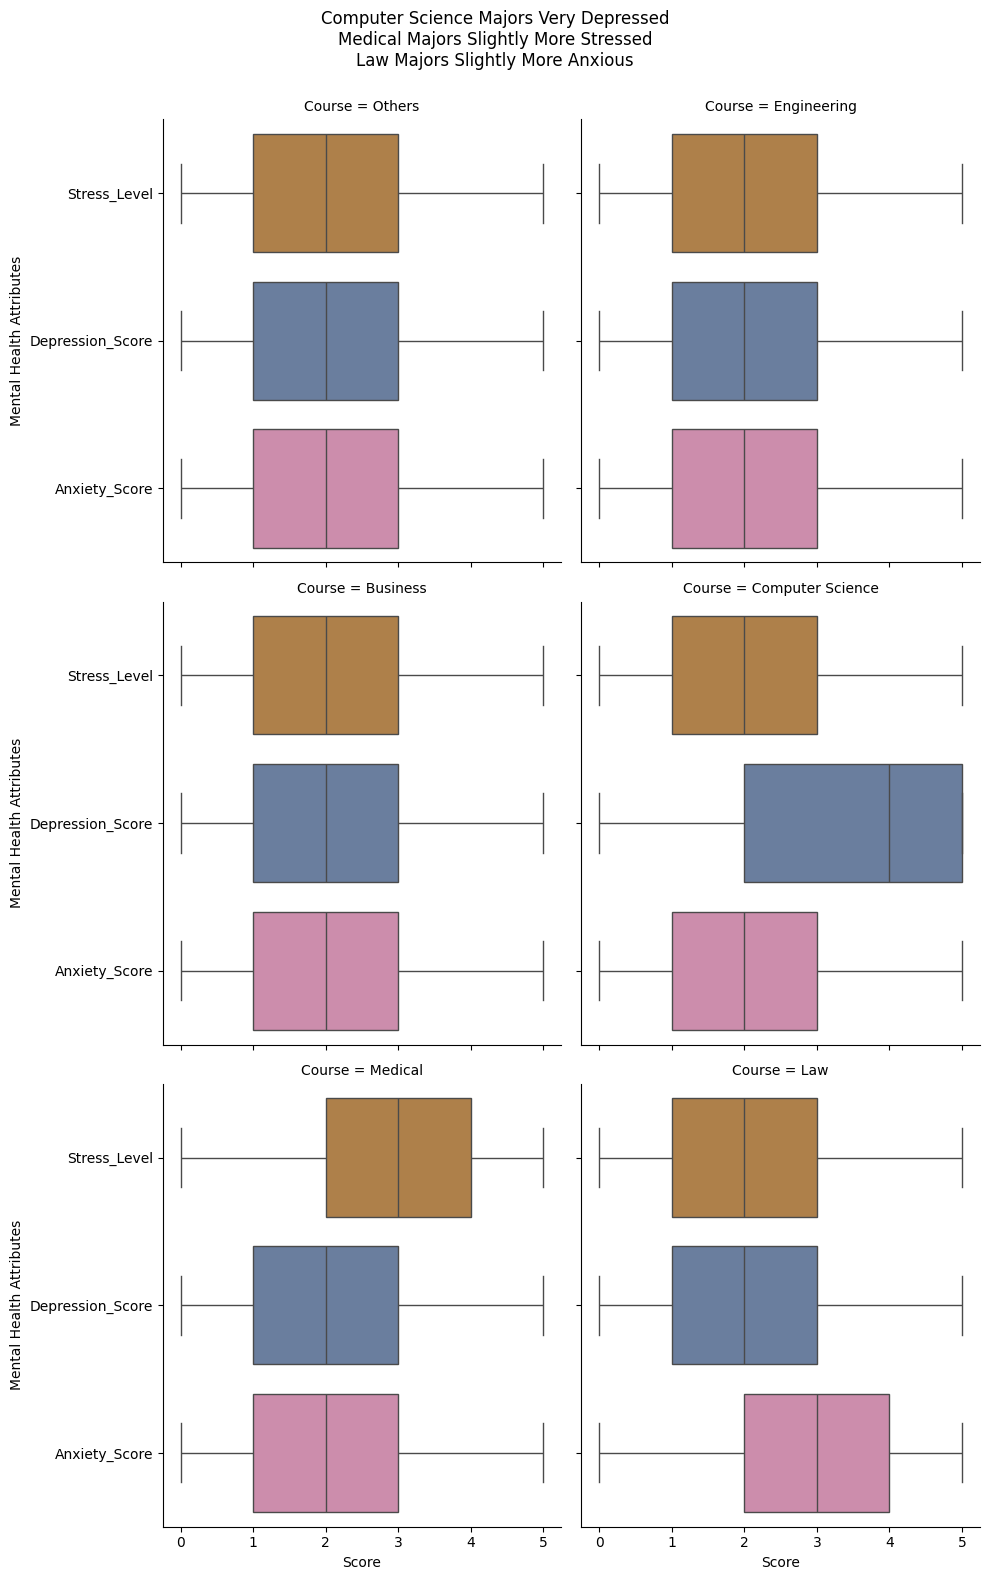

In [ ]:
# Which majors show trends of higher stress, depression, and anxiety scores?

melted_course = pd.melt(mental_health_df, id_vars=['Course'], value_vars=['Stress_Level', 'Depression_Score', 'Anxiety_Score'])
melted_course = melted_course.rename(columns={"variable":"Mental Health Attributes",
                       "value":"Score"})

melted_course.info()

stress_dep_anx_course=sns.catplot(
    data=melted_course,
    kind="box",
    x="Score",
    y="Mental Health Attributes",
    col="Course",
    col_wrap=2,
    palette=mental_health_colors
)

#title
stress_dep_anx_course.fig.suptitle("Computer Science Majors Very Depressed\nMedical Majors Slightly More Stressed\nLaw Majors Slightly More Anxious", y=1.05);
plt.savefig('stress_dep_anx_course.png', bbox_inches = "tight")


####Sleep_Quality to Stress_Level, Depression_Score, Anxiety_Score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21066 entries, 0 to 21065
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sleep_Quality             21066 non-null  object
 1   Mental Health Attributes  21066 non-null  object
 2   Score                     21066 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 493.9+ KB


<ipython-input-17-1868485da65e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stress_dep_anx_sleep=sns.catplot(


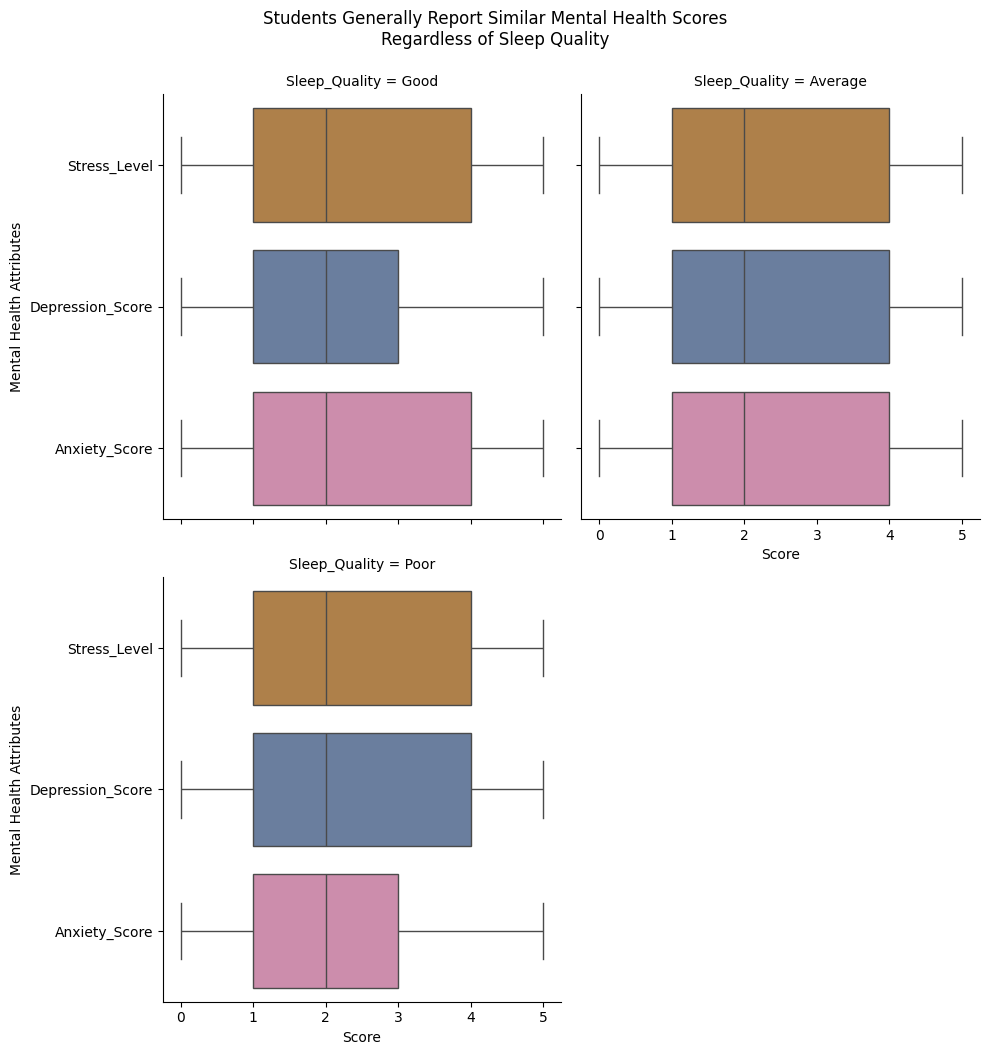

In [ ]:
melted_sleep = pd.melt(mental_health_df, id_vars=['Sleep_Quality'], value_vars=['Stress_Level', 'Depression_Score', 'Anxiety_Score'])
melted_sleep = melted_sleep.rename(columns={"variable":"Mental Health Attributes",
                       "value":"Score"})

melted_sleep.info()

stress_dep_anx_sleep=sns.catplot(
    data=melted_sleep,
    kind="box",
    x="Score",
    y="Mental Health Attributes",
    col="Sleep_Quality",
    col_wrap=2,
    palette=mental_health_colors
)

stress_dep_anx_sleep.fig.suptitle("Students Generally Report Similar Mental Health Scores\nRegardless of Sleep Quality", y=1.05);
plt.savefig('stress_dep_anx_sleep.png', bbox_inches = "tight")

#arguably people with Good sleep quality are slightly less depressed
#and people with Poor sleep quality are slightly less anxious
#but overall they're pretty much the same distribution

####Family_History to Stress_Level, Anxiety_Score, Depression_Score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21066 entries, 0 to 21065
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Family_History_Of_Mental_Illness  21066 non-null  object
 1   Mental Health Attributes          21066 non-null  object
 2   Score                             21066 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 493.9+ KB


<ipython-input-18-cd50131d037b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stress_dep_anx_fam_hist=sns.catplot(


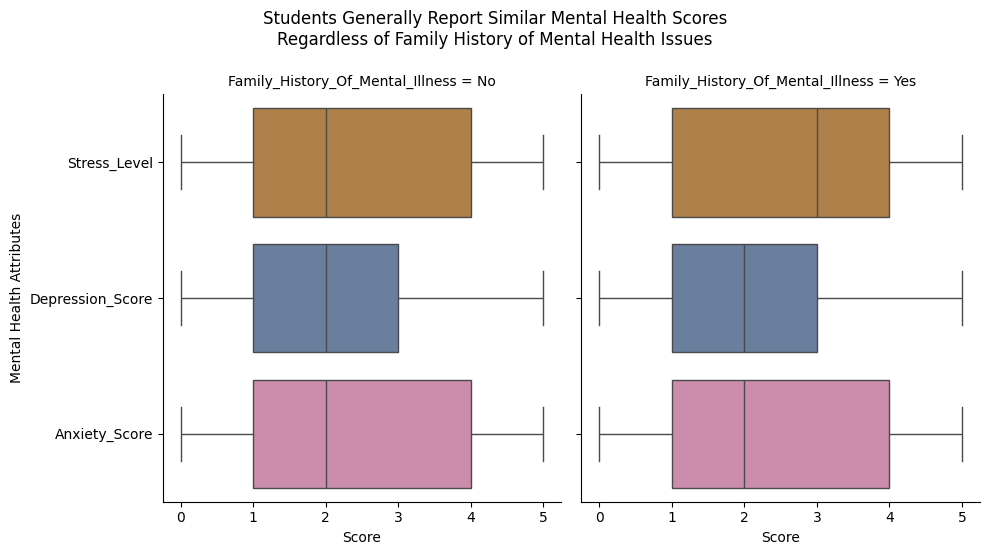

In [ ]:
melted_fam_hist = pd.melt(mental_health_df, id_vars=['Family_History'], value_vars=['Stress_Level', 'Depression_Score', 'Anxiety_Score'])
melted_fam_hist = melted_fam_hist.rename(columns={"variable":"Mental Health Attributes",
                                                  "value":"Score",
                                                  "Family_History":"Family_History_Of_Mental_Illness"})

melted_fam_hist.info()

stress_dep_anx_fam_hist=sns.catplot(
    data=melted_fam_hist,
    kind="box",
    x="Score",
    y="Mental Health Attributes",
    col="Family_History_Of_Mental_Illness",
    col_wrap=2,
    palette=mental_health_colors
)

stress_dep_anx_fam_hist.fig.suptitle("Students Generally Report Similar Mental Health Scores\nRegardless of Family History of Mental Health Issues", y=1.1);
plt.savefig('stress_dep_anx_fam_hist.png', bbox_inches = "tight")

#arguably people with a family history of mental health issues are slightly more stressed

###QUESTION: Which major groups are most likely to fall into substance use?
Based on the graphs, it looks like all the majors have the same percentage of people never/occasionally/frequently using drugs.

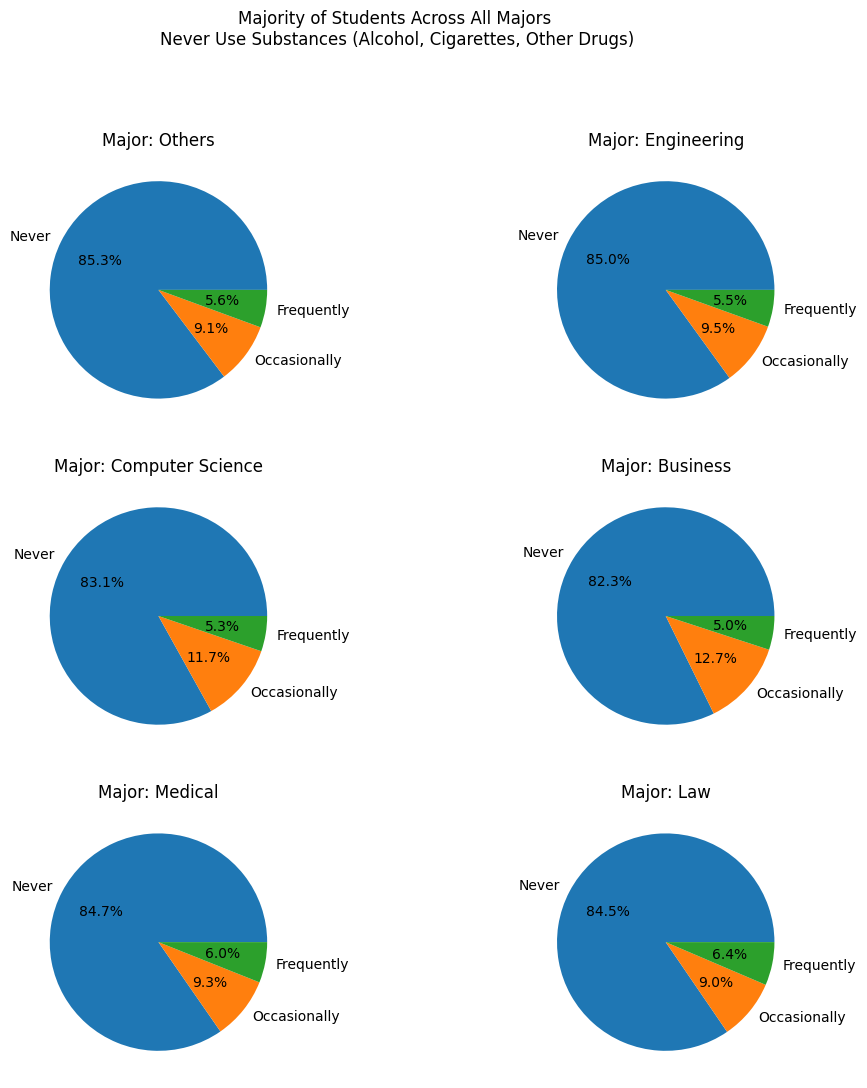

In [ ]:
# Which major groups are most likely to fall into substance use?
#based on the graphs, it looks like all the majors have the same percentage of people never/occasionally/frequently using drugs

#i want to see the unique values in Substance_Use
uniq_sub_use = mental_health_df["Substance_Use"].unique()
uniq_sub_use

#clean the data to exclude null values
mental_health_df_clean = mental_health_df.dropna(subset = ['Substance_Use'])

#want to know the percentage of people from each major that do drugs
#pie chart of each major, each slice is the percentage of people that either frequently/occasionally/never do drugs

#create figure with 6 subplots, 3 rows 2 cols
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))

#dicitonary to hold value_counts() Series
value_counts = {}

#for every major in the dataset
for course in mental_health_df["Course"].unique():

  #get the value counts for each option in substance use
  course_substance_use_value_counts = mental_health_df[mental_health_df["Course"] == course]["Substance_Use"].value_counts()
  value_counts[course] = course_substance_use_value_counts

#initialize subplot for Others
ax1.pie(value_counts["Others"], autopct='%1.1f%%', labels=value_counts["Others"].index.to_list())
ax1.set_title("Major: Others")

#initialize subplot for Engineering
ax2.pie(value_counts["Engineering"], autopct='%1.1f%%', labels=value_counts["Engineering"].index.to_list())
ax2.set_title("Major: Engineering")

#initialize subplot for Computer Science
ax3.pie(value_counts["Computer Science"], autopct='%1.1f%%', labels=value_counts["Computer Science"].index.to_list())
ax3.set_title("Major: Computer Science")

#initialize subplot for Business
ax4.pie(value_counts["Business"], autopct='%1.1f%%', labels=value_counts["Business"].index.to_list())
ax4.set_title("Major: Business")

#initialize subplot for Medical
ax5.pie(value_counts["Medical"], autopct='%1.1f%%', labels=value_counts["Medical"].index.to_list())
ax5.set_title("Major: Medical")

#initialize subplot for Law
ax6.pie(value_counts["Law"], autopct='%1.1f%%', labels=value_counts["Law"].index.to_list())
ax6.set_title("Major: Law")

#Title of whole figure
fig.suptitle("Majority of Students Across All Majors \nNever Use Substances (Alcohol, Cigarettes, Other Drugs)", y=1);

#save figure as png
plt.savefig('major_subs_use.png', bbox_inches = "tight")

plt.show()

#all the stats look to be around the same regardless of major